In [ ]:
!pip install pymp-pypi

In [ ]:
!git clone https://github.com/Computational-Turbulence-Group/SURD.git

Cloning into 'SURD'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 126 (delta 20), reused 15 (delta 15), pack-reused 101 (from 1)
Receiving objects: 100% (126/126), 56.65 MiB | 15.48 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
import os
os.chdir('/content/SURD')

In [ ]:
from SURD.utils import *

In [ ]:
from SURD.utils import surd

In [ ]:
import numpy as np

In [ ]:
fname = '/content/weekly_summary_1991-2021.csv'
df = pd.read_csv(fname)
df = df.drop(columns=['Date'])

In [ ]:
df.head()

,Precipitation,Mean_air_temperature,Mean_relative_humidity,Mean_cloud_cover,Average_air_pressure
0,6.9,-3.383333,92.166667,7.216667,997.266667
1,18.5,-7.442857,82.571429,5.457143,1000.728571
2,27.2,0.071429,92.571429,7.428571,991.928571
3,10.2,-7.314286,89.285714,6.557143,1000.685714
4,10.3,0.485714,88.142857,6.857143,1015.742857


In [ ]:
data_df = df.transpose()
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617
Precipitation,6.900000,18.500000,27.200000,10.200000,10.300000,17.000000,6.400000,7.100000,0.300000,0.000000,...,5.800000,6.600000,4.700000,49.600000,6.800000,1.400000,3.800000,5.300000,2.100000,0.30
Mean_air_temperature,-3.383333,-7.442857,0.071429,-7.314286,0.485714,0.442857,-4.685714,-3.985714,-0.728571,-4.714286,...,-0.200000,-0.742857,-3.542857,-1.514286,-7.271429,-3.314286,-1.842857,-1.185714,-5.171429,-7.74
Mean_relative_humidity,92.166667,82.571429,92.571429,89.285714,88.142857,88.285714,86.714286,90.857143,90.142857,93.000000,...,79.285714,79.428571,74.142857,86.428571,71.857143,81.000000,92.285714,93.285714,83.714286,78.80
Mean_cloud_cover,7.216667,5.457143,7.428571,6.557143,6.857143,7.042857,5.671429,6.528571,6.285714,4.471429,...,6.042857,6.571429,5.942857,6.814286,5.000000,4.185714,4.842857,4.700000,6.100000,5.98
Average_air_pressure,997.266667,1000.728571,991.928571,1000.685714,1015.742857,1022.057143,1005.642857,996.642857,1024.028571,1025.771429,...,1008.657143,1002.928571,1010.171429,999.871429,1004.528571,1007.700000,1012.285714,1004.942857,1016.385714,1008.54


In [ ]:
data = np.array(data_df)
data.shape

(5, 1618)

In [ ]:
nt * delta_t

165.376

In [ ]:
X = data
nvars = X.shape[0]
nt = X.shape[1]
nbins = 10
nlag = 1

# Time
delta_t = 1 # 0.0076  # Time step (in units of Tε)
total_time = 1618 # 165  # Total simulation time (in units of Tε)
time = np.arange(0, nt * delta_t, delta_t)

In [ ]:
time

array([   0,    1,    2, ..., 1615, 1616, 1617])

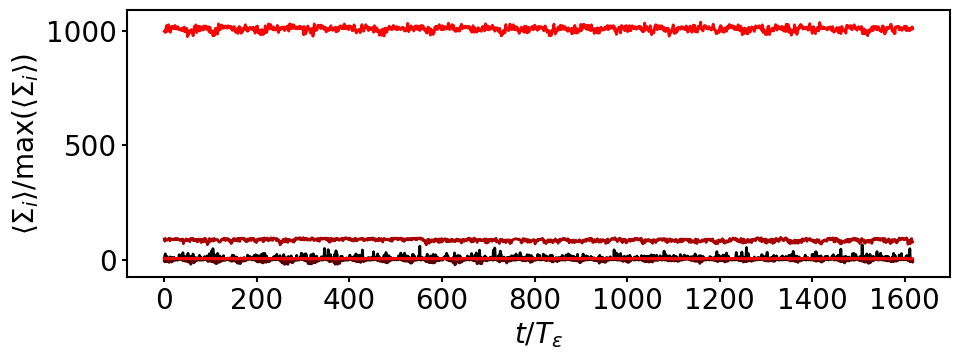

In [ ]:

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Create a custom colormap from black to red
colors = [(0, 0, 0), (1, 0, 0)]  # Black to Red
n_bins = 4  # Increase this number for a smoother transition
cmap_name = 'my_black_red'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot each variable
for i in range(nvars):
    color = cm(i)  # Get color from colormap
    axs.plot(time,X[i, :], color=color, linewidth=2)

# axs.set_xlim(0, 5)  # Set x-axis limits
# axs.set_ylim(0.3, 0.9)  # Set x-axis limits
axs.set_ylabel(f'$\\langle\Sigma_i\\rangle / \\max\\left( \\langle\Sigma_i\\rangle \\right)$')
axs.set_xlabel(f'$t/T_\\varepsilon$')

# Adjust layout
plt.tight_layout()

# change all spines
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(1.5)

# increase tick width
axs.tick_params(width=1.5)

# Show plot
plt.show()

In [ ]:
nvars

5

In [ ]:
# Define the range of nlag values
nlags_range = range(1, 30, 1)

# Initialize a dictionary to store results
unique_lag = {i: [] for i in range(nvars)}

for i in range(nvars):
    for nlag in nlags_range:
        print(f"Lag {nlag}")

        # Prepare the data
        Y = np.vstack([X[i, nlag:], X[:, :-nlag]])
        hist, _ = np.histogramdd(Y.T, bins=nbins)
        I_R, I_S, MI, info_leak = surd.surd(hist)

        # Calculate the sum of causalities for single-digit tuples
        single_digit_keys = [key for key in I_R.keys() if len(key) == 1 and key != (i+1,)]
        sum_causalities = sum(I_R[key] for key in single_digit_keys)

        # Store the sum for this variable and nlag
        unique_lag[i].append(sum_causalities)

    print('\n')

# Plotting the results
plt.figure(figsize=(10, 6))
for var, sums in unique_lag.items():
    plt.plot(nlags_range, sums, label=f'Variable {var + 1}')

plt.xlabel('Lag')
plt.ylabel('Sum of Causalities')
plt.title('Evolution of Causality as a Function of Lag for Variables')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
sums

In [ ]:
# Select the time lags
nlags = np.array([3, 3, 3, 3, 3])

# Storing the results
I_R_results = {}  # Dictionary to store redundant contributions
I_S_results = {}  # Dictionary to store synergistic contributions
MI_results = {}   # Dictionary to store mutual information results
info_leak_results = {}  # Dictionary to store information leak results

for i in range(nvars):
    print(f'SURD CAUSALITY FOR SIGNAL {i+1}')

    # Organize data (0 target variable, 1: agent variables)
    Y = np.vstack([X[i, nlags[i]:], X[:, :-nlags[i]]])

    # Run SURD
    hist, _ = np.histogramdd(Y.T, nbins)
    I_R, I_S, MI, info_leak = surd.surd(hist)

    # Print results
    surd.nice_print(I_R, I_S, MI, info_leak)
    print('\n')

    # Save the results
    I_R_results[i+1] = I_R
    I_S_results[i+1] = I_S
    MI_results[i+1] = MI
    info_leak_results[i+1] = info_leak

# Save the results to a file
with open('/content/SURD/results/energy_cascade.pkl', 'wb') as file:
    pickle.dump({
        'I_R_results': I_R_results,
        'I_S_results': I_S_results,
        'MI_results': MI_results,
        'info_leak_results': info_leak_results
    }, file)

print("Results saved to '/content/SURD/results/energy_cascade.pkl'")

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (1, 4)      : 0.0000
        (1, 5)      : 0.0003
        (2, 3)      : 0.0005
        (2, 4)      : 0.0000
        (2, 5)      : 0.0015
        (3, 4)      : 0.0011
        (3, 5)      : 0.0019
        (4, 5)      : 0.0000
        (1, 2, 3)   : 0.0000
        (1, 2, 4)   : 0.0000
        (1, 2, 5)   : 0.0000
        (1, 3, 4)   : 0.0009
        (1, 3, 5)   : 0.0000
        (1, 4, 5)   : 0.0000
        (2, 3, 4)   : 0.0012
        (2, 3, 5)   : 0.0001
        (2, 4, 5)   : 0.0000
        (3, 4, 5)   : 0.0005
        (1, 2, 3, 4): 0.0008
        (1, 2, 3, 5): 0.0004
        (1, 2, 4, 5): 0.0006
        (1, 3, 4, 5): 0.0000
        (2, 3, 4, 5): 0.0013
        (1, 2, 3, 4, 5): 0.0151
    Unique (U):
        (1,)        : 0.0041
        (2,)        : 0.0022
        (3,)        : 0.0013
        (4,)        : 0.0006
        (5,)        : 0.0046
    Synergystic (S):
        (1, 2)

In [ ]:
# Load the results in case the results have already been computed
with open('/content/SURD/results/energy_cascade.pkl', 'rb') as file:
    results = pickle.load(file)

I_R_results = results['I_R_results']
I_S_results = results['I_S_results']
MI_results = results['MI_results']
info_leak_results = results['info_leak_results']

In [ ]:
information_flux = {}

fig, axs = plt.subplots(nvars, 2, figsize=(12, 6*nvars), gridspec_kw={'width_ratios': [nvars*30, 1]})
plt.rcParams.update({'font.size': 18})

for i in range(nvars):
    I_R = I_R_results[i+1]
    I_S = I_S_results[i+1]
    MI = MI_results[i+1]
    info_leak = info_leak_results[i+1]

    information_flux[i+1] = surd.plot_nlabels(I_R, I_S, info_leak, axs[i,:], nvars, nlabels=12)

    # Plot formatting
    axs[i,0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {i+1}}} / I \\left(\\Sigma_{i+1}^+ ; \\mathrm{{\\mathbf{{\\Sigma}}}} \\right)$',pad=10)
    axs[i,1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {i+1}}}}}{{H \\left(\\Sigma_{i+1} \\right)}}$',pad=17)
    axs[i,1].set_yticks([0,1])
    axs[i,0].set_xticklabels(axs[i,0].get_xticklabels(), fontsize=16, rotation = 60, ha = 'right', rotation_mode='anchor')

plt.tight_layout(w_pad=-15, h_pad=-0.1)
plt.show()